# Testing segmentation visualizer

This will be used to observe how the segmentation predictions evolve over training. 

In [1]:
import os
import sys
from os.path import join as pjoin
import numpy as np

import torch
from torchvision import transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
data_dir = '/scratch/users/austin.zane/ucsf_fast/data/pilot_labeling/AnnotationData/MorisonPouchMasks_1-23'
sys.path.append('/accounts/campus/austin.zane/ucsf_fast')
from common.datasets import FASTDataset

In [3]:
from experiments.train import visualize_segmentation_overlay

In [4]:
custom_dataset = FASTDataset(data_dir=data_dir)
dataloader = DataLoader(custom_dataset, batch_size=1, shuffle=True)

In [5]:
for images, labels in dataloader:
    print(images.shape, labels.shape)
    train_img = images
    train_label = labels
    break

torch.Size([1, 1, 720, 960]) torch.Size([1, 1, 720, 960])


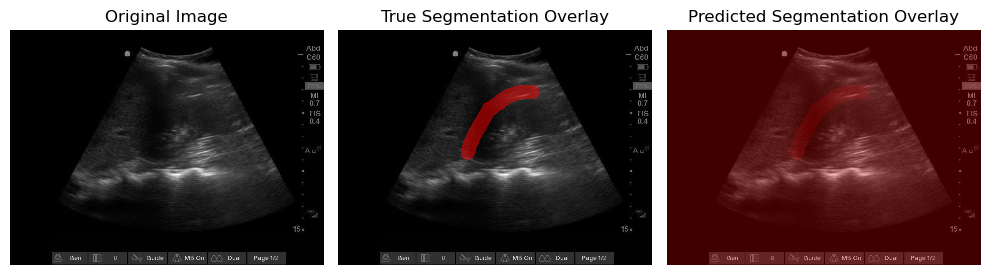

In [6]:
ex_image = train_img[0]
ex_label = train_label[0]

visualize_segmentation_overlay(ex_image, mask_tensor_true=ex_label,mask_tensor_pred=ex_label, alpha=0.5)

# Presenting the saved images

I now have images that should show how segmentation evolves over training, but I have to find a way to present them.

In [18]:
img = Image.open('/scratch/users/austin.zane/ucsf_fast/figures/segmentation_overlay/02_21_2024/epoch_4_batch_30_image_0.png')

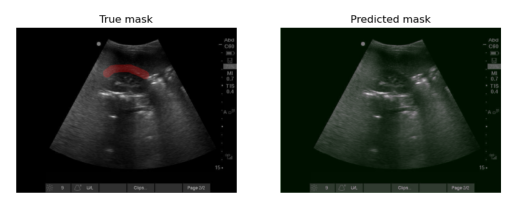

In [19]:
plt.imshow(img)
plt.axis('off')
plt.show()

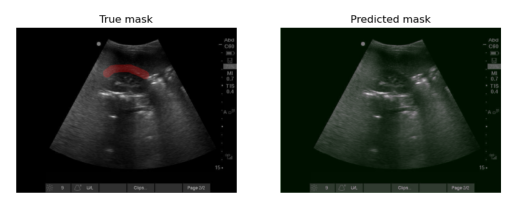

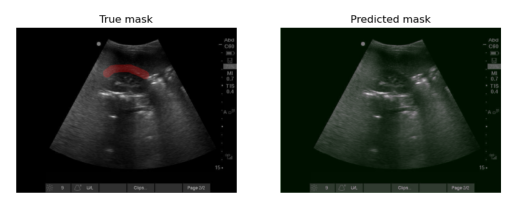

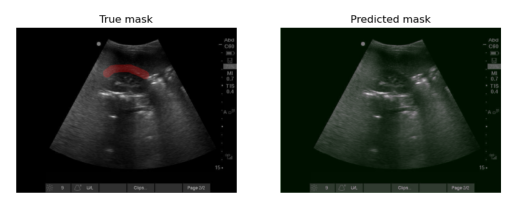

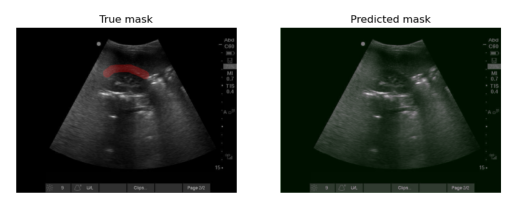

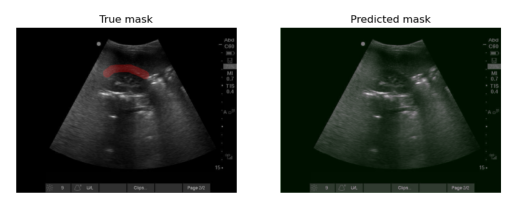

In [20]:
fig_dir = '/scratch/users/austin.zane/ucsf_fast/figures/segmentation_overlay/02_21_2024/'
n_epochs = 5

for i in range(n_epochs):
    img_name = f'epoch_{i}_batch_30_image_0.png'
    plt.imshow(img)
    plt.axis('off')
    plt.show()